In [1]:
import cv2
import matplotlib.pyplot as plt

In [30]:
image_cv2_yunet = cv2.imread("../Seizure_videos/futurs_numeriques_2024.png")
height, width, _ = image_cv2_yunet.shape

model1 = "face_detection_yunet_2023mar.onnx"
model2 = "yunet_n_360_360.onnx"
model3 = "yunet_n_640_640.onnx"
model4 = "yunet_n_dynamic.onnx"

yunet = f"./Models/{model3}"
detector = cv2.FaceDetectorYN.create(yunet, "", (0, 0))
detector.setInputSize((width, height))


In [26]:
_, faces = detector.detect(image_cv2_yunet)

(-0.5, 4031.5, 3023.5, -0.5)

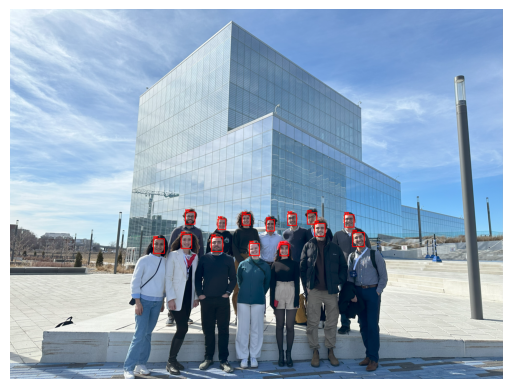

In [27]:
if faces is not None: 
   for face in faces:
      # parameters: x1, y1, w, h, x_re, y_re, x_le, y_le, x_nt, y_nt, x_rcm, y_rcm, x_lcm, y_lcm
     
      # bouding box
      box = list(map(int, face[:4]))
      color = (0, 0, 255)
      cv2.rectangle(image_cv2_yunet, box, color, 5)
      
      # confidence
      confidence = face[-1]
      confidence = "{:.2f}".format(confidence)
      position = (box[0], box[1] - 10)
      cv2.putText(image_cv2_yunet, confidence, position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 3, cv2.LINE_AA)
      image_rgb = cv2.cvtColor(image_cv2_yunet, cv2.COLOR_BGR2RGB)


plt.figure()
plt.imshow(image_rgb)
plt.axis('off')